<a href="https://colab.research.google.com/github/StephenManoharGurram/Programming-Assignment-1/blob/main/Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_path = '/content/drive/MyDrive/Velozity/Accidents/data'

In [ ]:
killed_df =  pd.read_csv(data_path+"/Road_Accidents_2017-Annuxure_Tables_3.csv")
injured_df =  pd.read_csv(data_path+"/Road_Accidents_2017-Annuxure_Tables_4.csv")

weather_df =  pd.read_csv(data_path+"/Acc_Classified_according_to_Type_of_Weather_Condition_2014_and_2016.csv")
roadcond_df =  pd.read_csv(data_path+"/Acc_clf_acco_to_Road_Cond_2014_and_2016.csv")

In [ ]:
killed_df = killed_df.drop(columns=killed_df.columns[5:])

In [ ]:
injured_df = injured_df.drop(columns=injured_df.columns[5:])

In [ ]:
year = 2013

In [ ]:
for i in range(1,5):
  killed_df = killed_df.rename(columns={killed_df.columns[i]:year+i})
  injured_df = injured_df.rename(columns={injured_df.columns[i]:year+i})

In [ ]:
injured_df

,States/UTs,2014,2015,2016,2017
0,Andhra Pradesh,29931,29439,30051,27475
1,Arunachal Pradesh,308,359,391,316
2,Assam,6499,7068,6127,6163
3,Bihar,6640,6835,5651,6014
4,Chhattisgarh,13157,13426,12955,12550
5,Goa,1879,2055,2026,1922
6,Gujarat,22493,21448,19949,16802
7,Haryana,8944,10794,10531,10339
8,Himachal Pradesh,5576,5108,5764,5452
9,Jammu & Kashmir,8043,8142,7692,7419


In [ ]:
north = ['Jammu & Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh', 'Jammu and Kashmir', 'Delhi']
east = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal', 'Orissa']
south = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra','Goa']
central = ['Madhya Pradesh', 'Chhattisgarh']
north_east = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry', 'Andaman & Nicobar Islands', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Lakshadweep', 'A & N Islands', 'D & N Haveli']

In [ ]:
def get_zonal_names(row):
    if row['States/UTs'].strip() in north:
        val = 'North Zone'
    elif row['States/UTs'].strip()  in south:
        val = 'South Zone'
    elif row['States/UTs'].strip()  in east:
        val = 'East Zone'
    elif row['States/UTs'].strip()  in west:
        val = 'West Zone'
    elif row['States/UTs'].strip()  in central:
        val = 'Central Zone'
    elif row['States/UTs'].strip()  in north_east:
        val = 'NE Zone'
    elif row['States/UTs'].strip()  in ut:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

In [ ]:
killed_df.drop(killed_df[killed_df['States/UTs'] == 'Total'].index, inplace=True)
killed_df['Zones'] = killed_df.apply(get_zonal_names, axis=1)
injured_df.drop(injured_df[injured_df['States/UTs'] == 'Total'].index, inplace=True)
injured_df['Zones'] = injured_df.apply(get_zonal_names, axis=1)

In [ ]:
roadcond_df.drop(roadcond_df[roadcond_df['States/UTs'] == 'Total'].index, inplace=True)
roadcond_df['Zones'] = roadcond_df.apply(get_zonal_names, axis=1)
weather_df.drop(weather_df[weather_df['States/UTs'] == 'Total'].index, inplace=True)
weather_df['Zones'] = weather_df.apply(get_zonal_names, axis=1)

In [ ]:
total_col = [col for col in weather_df.columns if 'Total' in col]
killed_col = [col for col in weather_df.columns if 'Killed' in col]
injured_col = [col for col in weather_df.columns if 'Injured' in col]
weather_df_killed = weather_df.drop(columns = total_col+injured_col)
weather_df_injured = weather_df.drop(columns = total_col+killed_col)

In [ ]:
total_col = [col for col in roadcond_df.columns if 'Accident' in col]
killed_col = [col for col in roadcond_df.columns if 'Killed' in col]
injured_col = [col for col in roadcond_df.columns if 'Injured' in col]
roadcond_df_killed = roadcond_df.drop(columns = total_col+injured_col)
roadcond_df_injured = roadcond_df.drop(columns = total_col+killed_col)

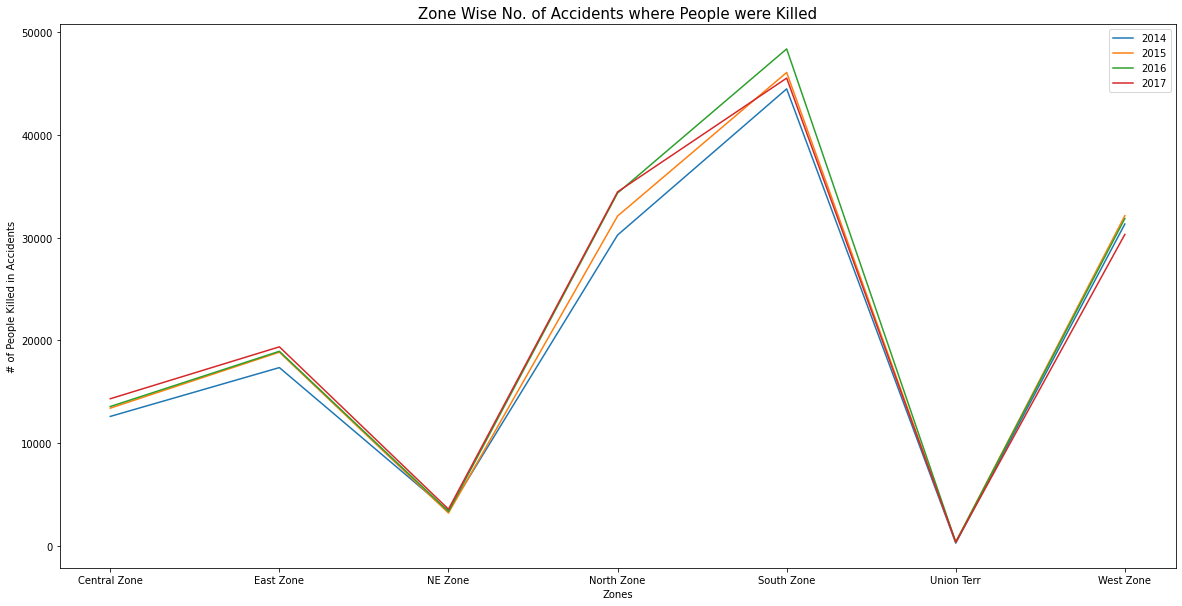

In [ ]:
df =pd.pivot_table(killed_df, index=['Zones'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.lineplot(x=df['Zones'],y=df[year], label=years[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Zone Wise No. of Accidents where People were Killed', fontsize=15)

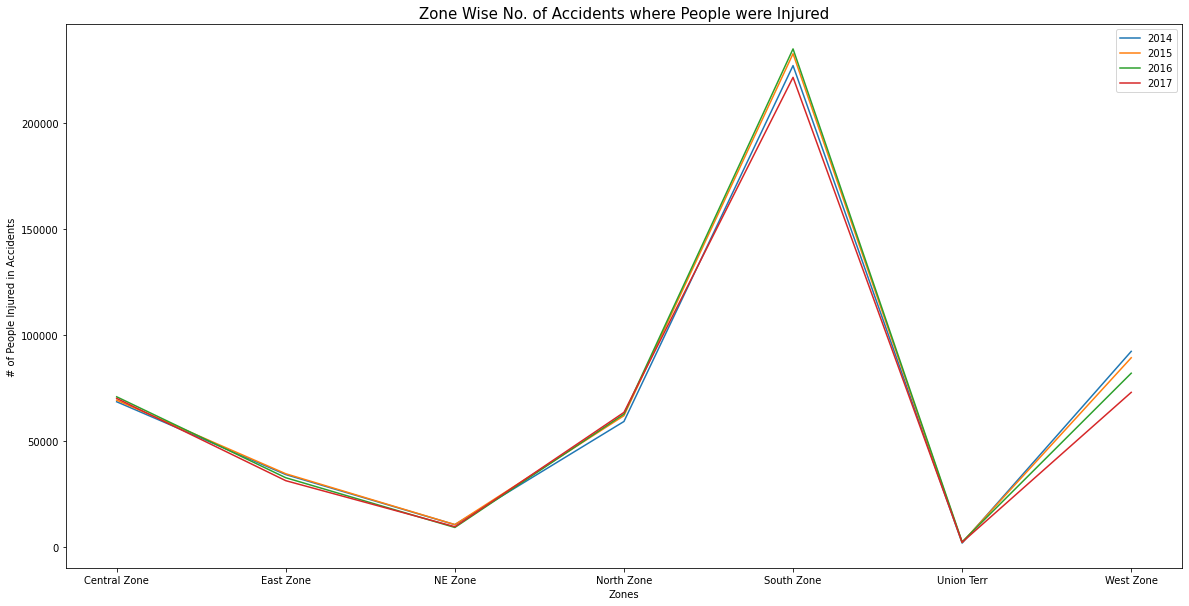

In [ ]:
df =pd.pivot_table(injured_df, index=['Zones'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.lineplot(x=df['Zones'],y=df[year], label=years[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Zone Wise No. of Accidents where People were Injured', fontsize=15)

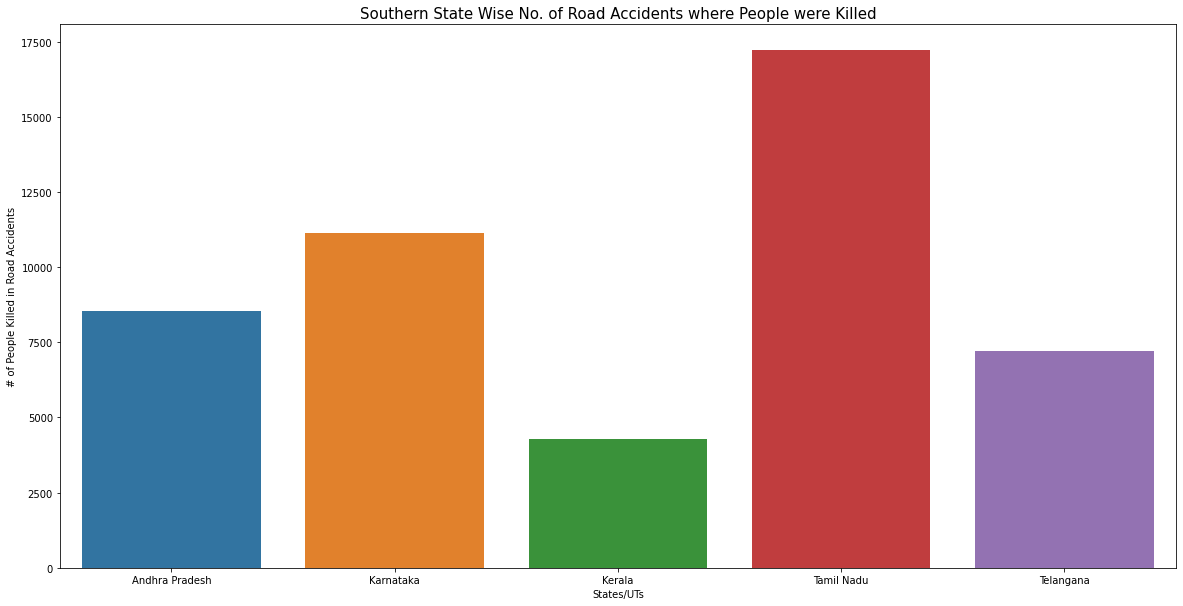

In [ ]:
sub_df = killed_df[killed_df['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.barplot(x=df['States/UTs'],y=df[year])
    plt.ylabel('# of People Killed in Road Accidents')
    plt.title('Southern State Wise No. of Road Accidents where People were Killed', fontsize=15)

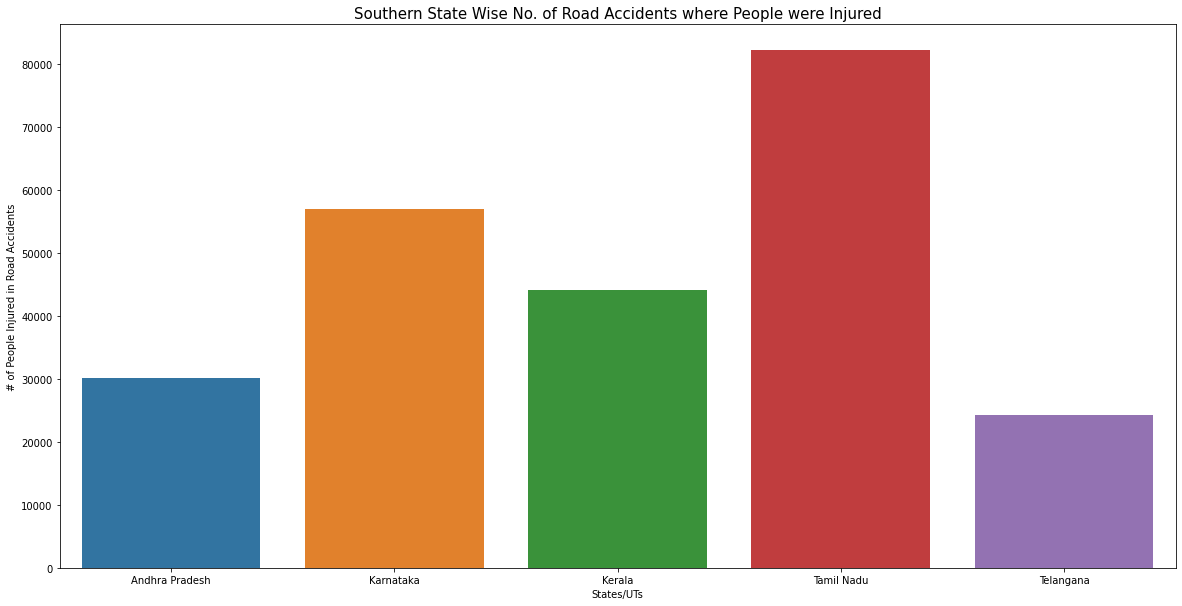

In [ ]:
sub_df = injured_df[injured_df['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.barplot(x=df['States/UTs'],y=df[year])
    plt.ylabel('# of People Injured in Road Accidents')
    plt.title('Southern State Wise No. of Road Accidents where People were Injured', fontsize=15)

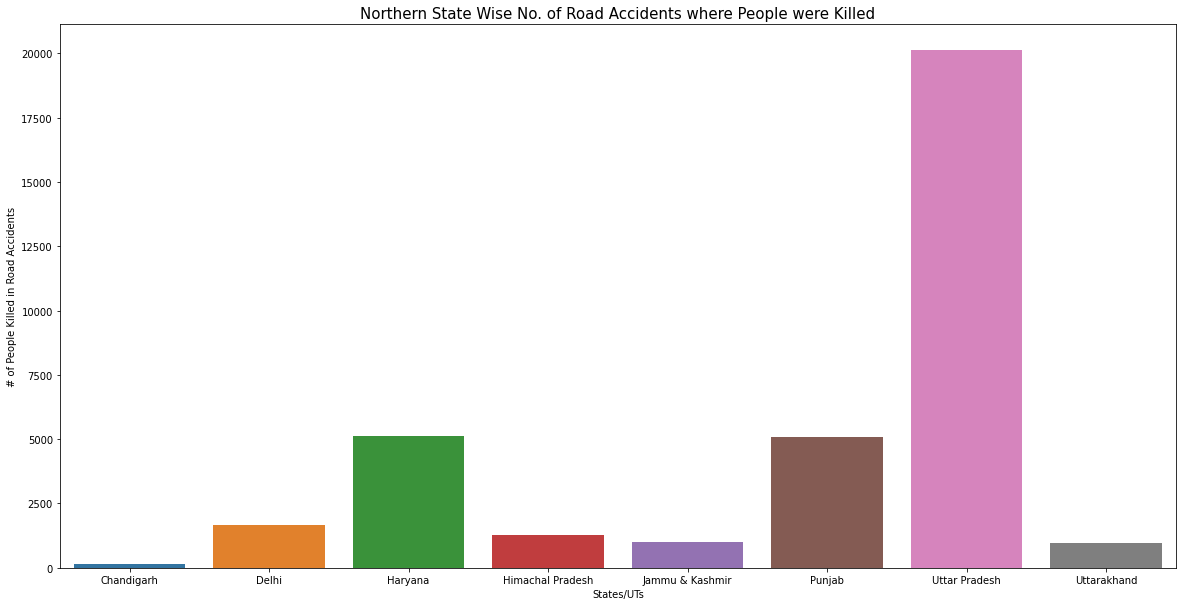

In [ ]:
sub_df = killed_df[killed_df['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.barplot(x=df['States/UTs'],y=df[year])
    plt.ylabel('# of People Killed in Road Accidents')
    plt.title('Northern State Wise No. of Road Accidents where People were Killed', fontsize=15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   States/UTs  8 non-null      object
 1   2014        8 non-null      int64 
 2   2015        8 non-null      int64 
 3   2016        8 non-null      int64 
 4   2017        8 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 448.0+ bytes


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

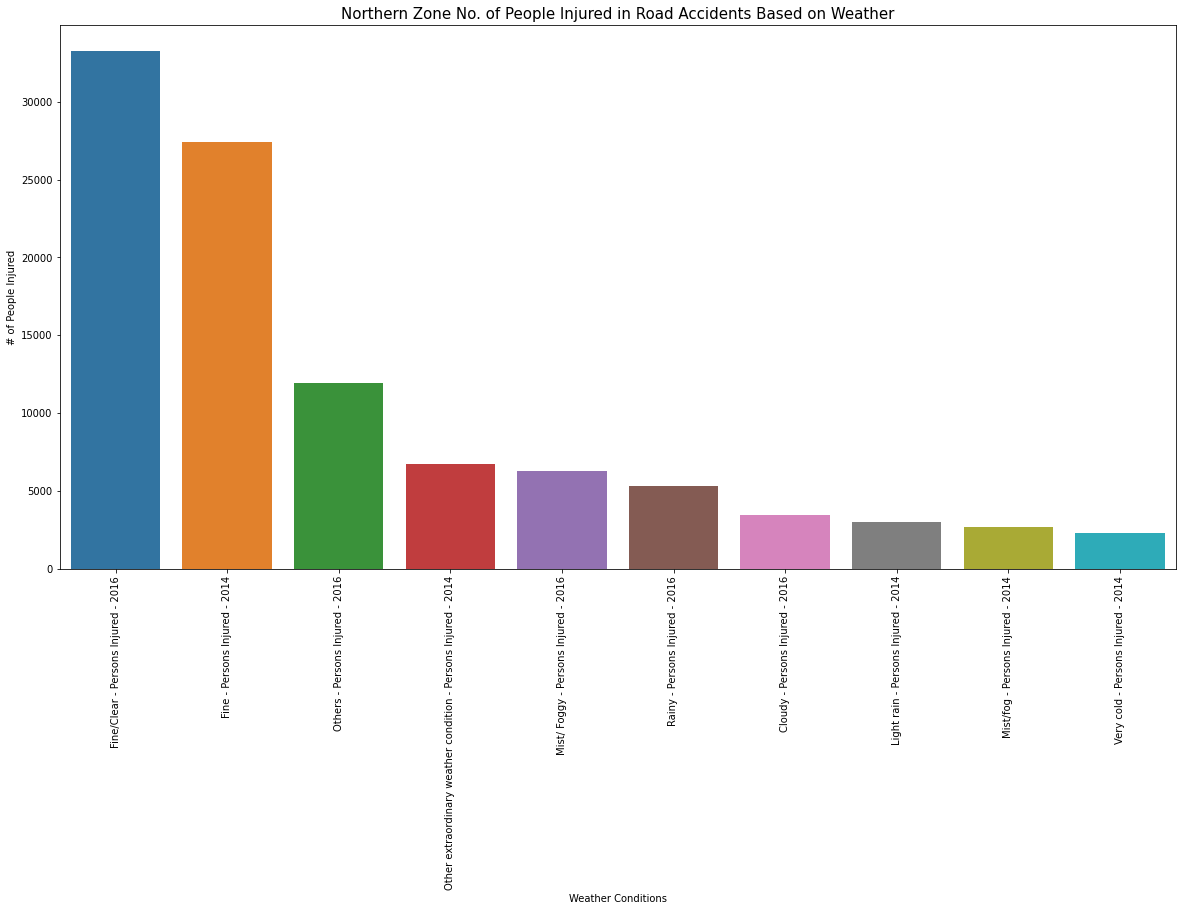

In [ ]:
sub_df = weather_df_injured[weather_df_injured['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Weather Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))

sns.barplot(x=df['Weather Conditions'],y=df['Total'])
plt.ylabel('# of People Injured')
plt.title('Northern Zone No. of People Injured in Road Accidents Based on Weather', fontsize=15)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

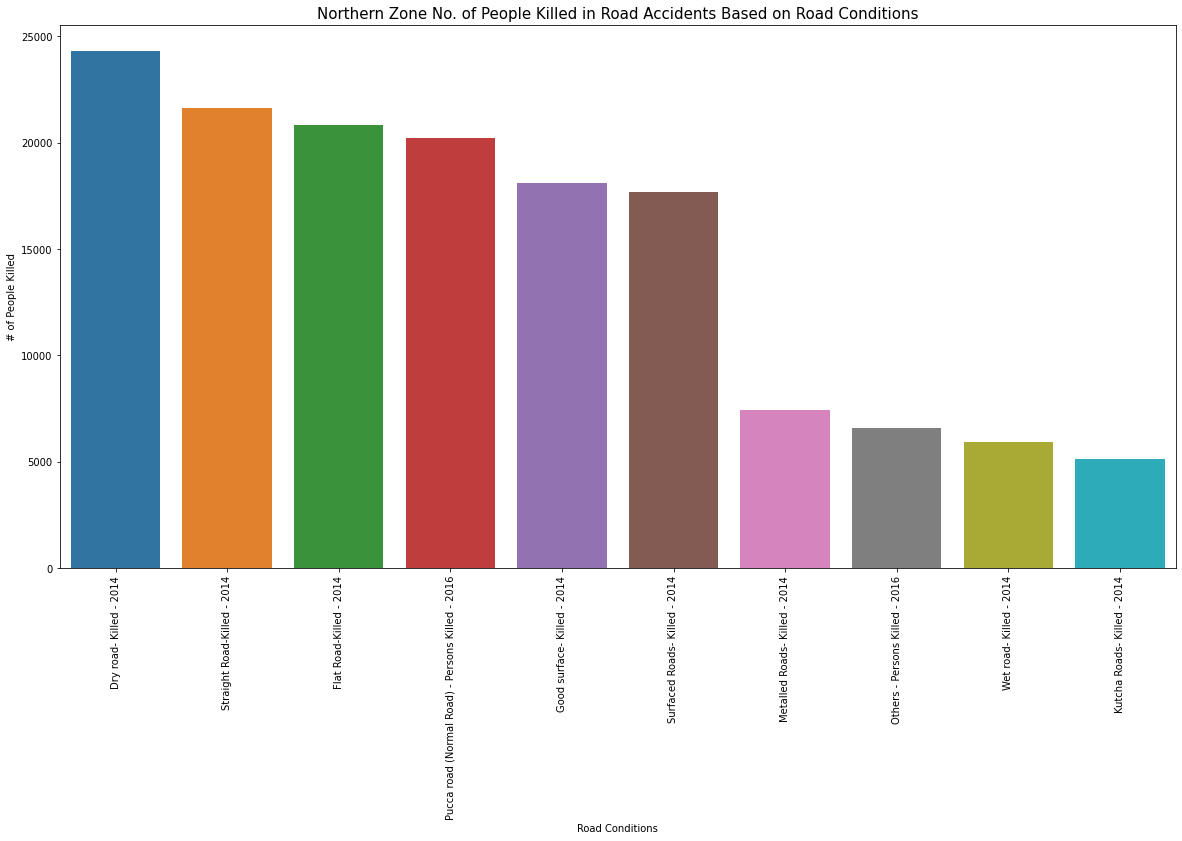

In [ ]:
sub_df = roadcond_df_killed[roadcond_df_killed['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Road Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x=df['Road Conditions'],y=df['Total'])
plt.ylabel('# of People Killed')
plt.title('Northern Zone No. of People Killed in Road Accidents Based on Road Conditions', fontsize=15)
plt.xticks(rotation=90)

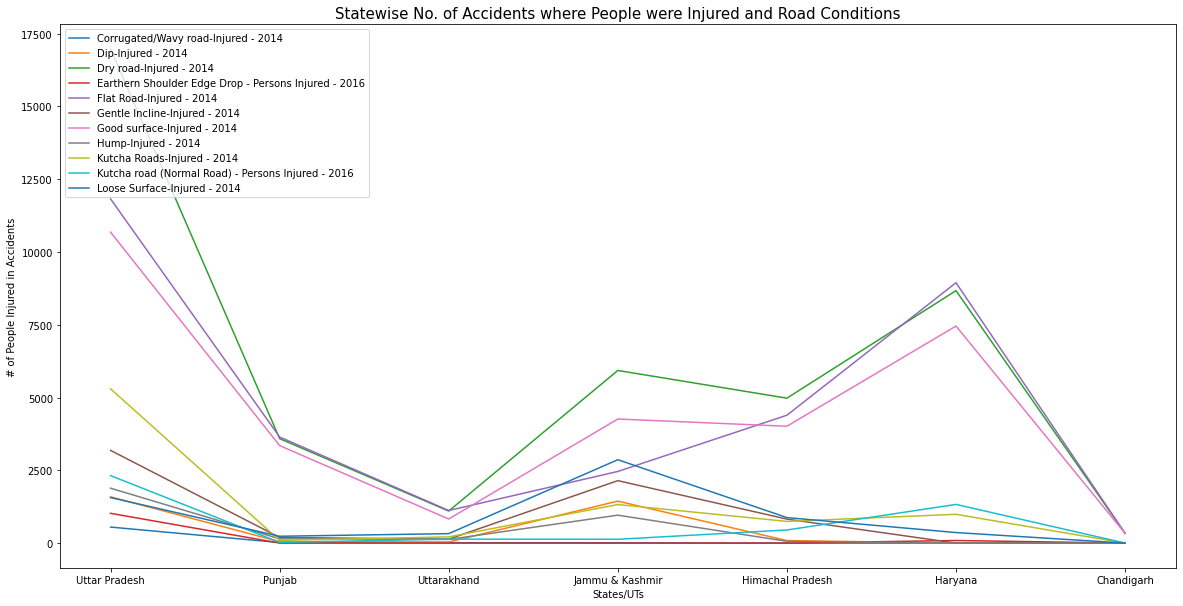

In [ ]:
sub_df = roadcond_df_injured[roadcond_df_injured['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Statewise No. of Accidents where People were Injured and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')